# MOVIE INDUSTRY ANALYSIS (1980-2020)

In [28]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import ticker
from scipy import stats
from scipy.stats import linregress
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data

df=pd.read_csv(r"C:\Users\ajoal\OneDrive\Desktop\movie.csv")

In [3]:
df.head()

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980-06-13,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980-07-02,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-06-20,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980-07-02,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980-07-25,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
#Basic Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   released  7666 non-null   object 
 4   votes     7665 non-null   float64
 5   director  7668 non-null   object 
 6   writer    7665 non-null   object 
 7   star      7667 non-null   object 
 8   country   7665 non-null   object 
 9   budget    5497 non-null   float64
 10  gross     7479 non-null   float64
 11  company   7651 non-null   object 
 12  runtime   7664 non-null   float64
dtypes: float64(4), object(9)
memory usage: 778.9+ KB


In [7]:
#Number of rows and columns

print('Total rows:', df.shape[0])
print('Total columns:', df.shape[1])

Total rows: 7668
Total columns: 13


## Data Cleaning

In [8]:
#Check for duplicates

df[df.duplicated()]

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime


In [9]:
#check for missing values

df.isnull().sum()

name           0
rating        77
genre          0
released       2
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [10]:
#Drop the rows that have missing values in budget and gross

df = df.dropna(subset=['budget'])
df = df.dropna(subset=['gross'])

# Fill missing values in ratings and company columns with "Unknown"

df['rating'] = df['rating'].fillna("Unknown")
df['company'] = df['company'].fillna("Unknown")

# Fill runtime with median runtime

df['runtime'] = df['runtime'].fillna(df['runtime'].median())

In [11]:
df[df['country'].isnull()]

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime
7615,Clinton Road,Unknown,Horror,2019-06-14,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0


In [12]:
#Fill country of clinton road movie as united states

df['country'] = df['country'].fillna("United States")

In [13]:
#All missing values has been populated

df.isnull().sum()

name        0
rating      0
genre       0
released    0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [14]:
#Data Types of each column

df.dtypes

name         object
rating       object
genre        object
released     object
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [15]:
#Change the data type of budget and gross

df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['votes']=df['votes'].astype('int64')

In [16]:
#Verify the change

df.dtypes

name         object
rating       object
genre        object
released     object
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [17]:
#Convert release_date to datetime

df['released'] = pd.to_datetime(df['released'])

In [18]:
#Extract year and month from released

df['release_year'] = df['released'].dt.year
df['release_month'] = df['released'].dt.month_name()

In [19]:
#Drop the row where year is 1905 because it is not informative to the dataset 

df = df.drop(df[df['release_year'] == 1905].index)

In [20]:
#Add new columns profit and roi

df['profit'] = df['gross'] - df['budget']
df['roi'] = df['profit'] / df['budget']

In [21]:
#New number of rows and columns

print('Total rows:', df.shape[0])
print('Total columns:', df.shape[1])

Total rows: 5431
Total columns: 17


In [22]:
#Cleaned dataset

df.head()

,name,rating,genre,released,votes,director,writer,star,country,budget,gross,company,runtime,release_year,release_month,profit,roi
0,The Shining,R,Drama,1980-06-13,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,June,27998772,1.473620
1,The Blue Lagoon,R,Adventure,1980-07-02,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,July,54353106,12.078468
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-06-20,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,June,520375067,28.909726
3,Airplane!,PG,Comedy,1980-07-02,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,July,79953539,22.843868
4,Caddyshack,R,Comedy,1980-07-25,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,July,33846344,5.641057


## Exploratory Data Analysis

### Top ten companies with high gross

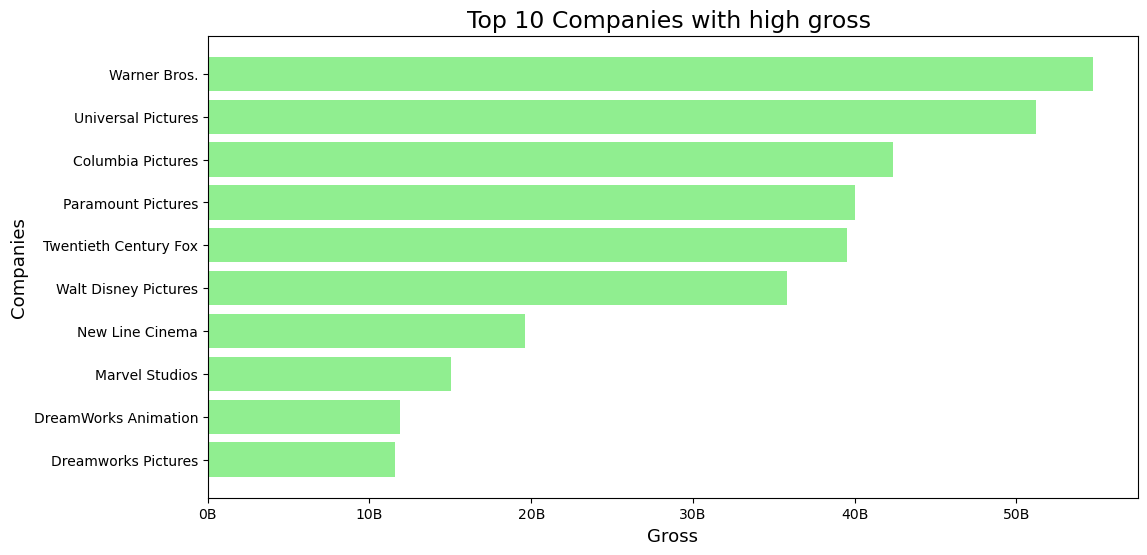

In [462]:
#Top ten companies with high gross
top_ten_companies = (
    df.groupby('company')[['gross']]
       .sum()
       .sort_values('gross', ascending=False)
       .head(10)
)

#Barplot
plt.figure(figsize=(12,6))
plt.barh(
    top_ten_companies.index, 
    top_ten_companies['gross'], 
    color='lightgreen'
)

# Add titles and labels
plt.xlabel('Gross', fontsize=13) 
plt.ylabel('Companies',fontsize=13) 
plt.title('Top 10 Companies with high gross ',fontsize=17)

# Format x-axis in millions
plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.0f}B')
)

plt.gca().invert_yaxis()
plt.show()

### Average profit that movie industry had each year since 1980

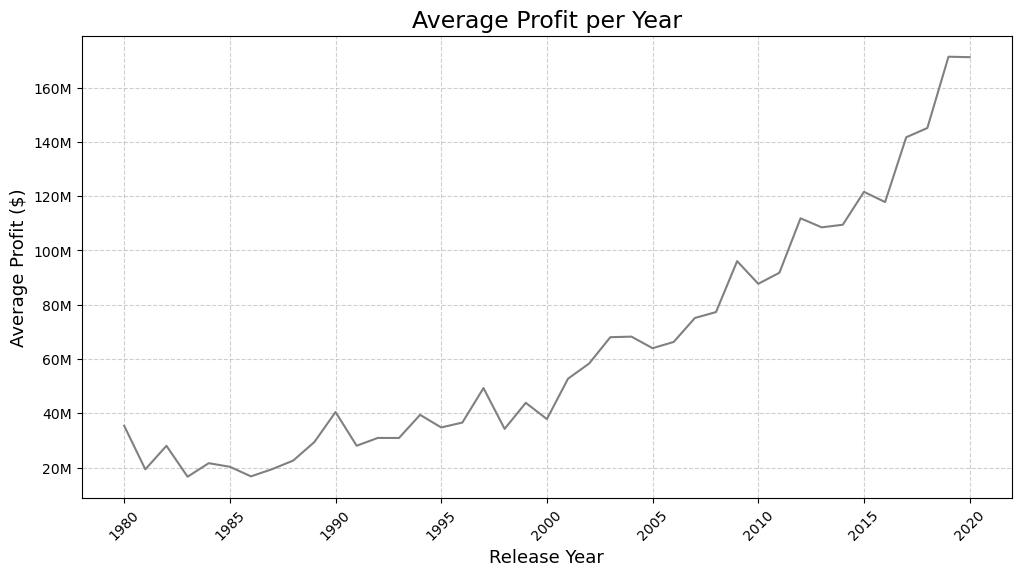

In [464]:
#Average profit that movie industry had each year since 1980

#Group by year
avg_profit_per_year = (
    df.groupby('release_year')[['profit']]
       .mean()
)    

#Plot
plt.figure(figsize=(12,6))
plt.plot(
    avg_profit_per_year.index, 
    avg_profit_per_year['profit'], 
    color='grey'
)

# Add titles and labels   
plt.xlabel("Release Year",fontsize=13)
plt.ylabel("Average Profit ($)",fontsize=13)
plt.title("Average Profit per Year",fontsize=17)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, pos: f'{y/1e6:.0f}M')
)

plt.show()

### Average profit of movie industry by month

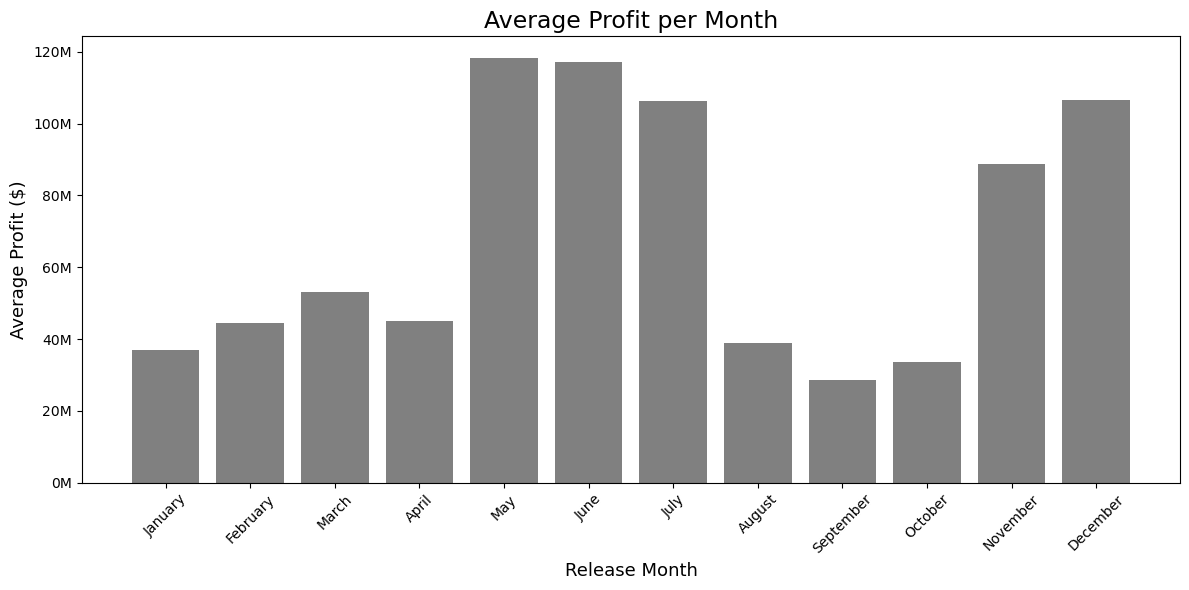

In [465]:
#Plot average profit of movie industry by month

# Group by month
avg_profit_per_month = (
    df.groupby('release_month')[['profit']]
       .mean()
       .reset_index()
)

# Use categorical type to enforce calendar order
months_ordered = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

avg_profit_per_month['release_month'] = pd.Categorical(
    avg_profit_per_month['release_month'], 
    categories=months_ordered, 
    ordered=True
)

# Sort by the defined order
avg_profit_per_month = avg_profit_per_month.sort_values('release_month')

#Barplot
plt.figure(figsize=(12,6))
plt.bar(
    avg_profit_per_month['release_month'], 
    avg_profit_per_month['profit'], 
    color='grey'
)

# Add titles and labels
plt.xlabel("Release Month", fontsize=13)
plt.ylabel("Average Profit ($)", fontsize=13)
plt.title("Average Profit per Month", fontsize=17)
plt.xticks(rotation=45)

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, pos: f'{y/1e6:.0f}M')
)

plt.tight_layout()
plt.show()

### Average profit of each genre 

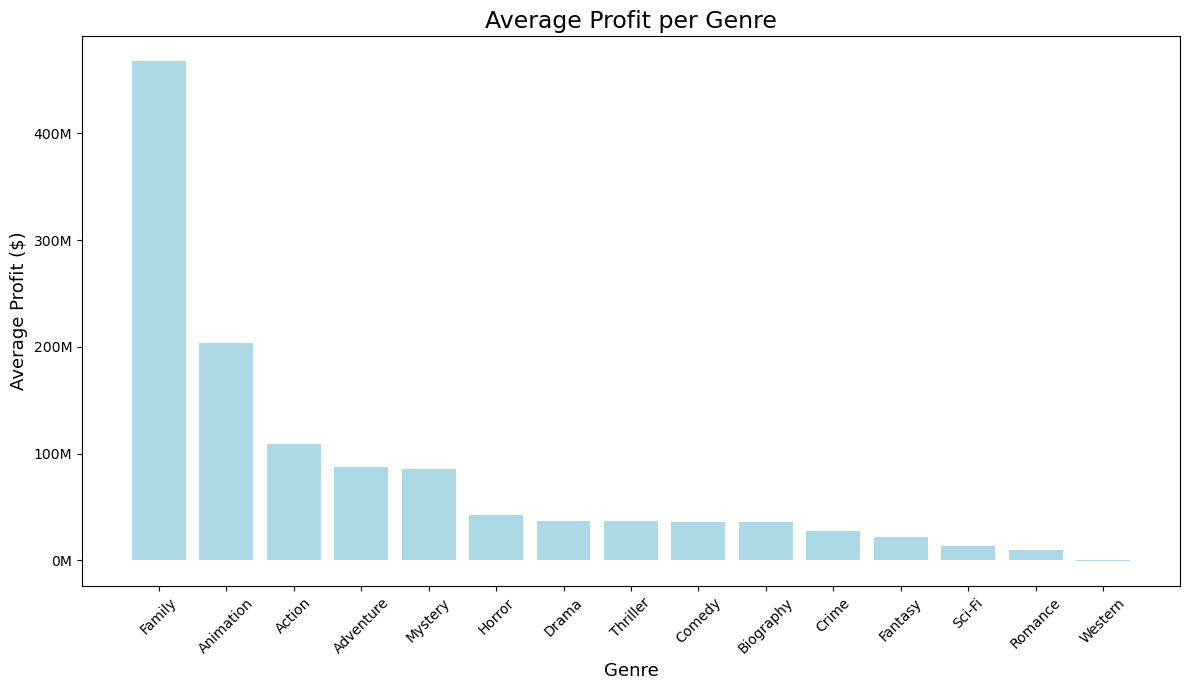

In [466]:
#Average profit of each genre 
avg_profit_per_genre = ( 
              df.groupby('genre')[['profit']]
                 .mean()
                 .sort_values(by='profit', ascending=False)
)   

#Barplot 
plt.figure(figsize=(12,7)) 
plt.bar(
    avg_profit_per_genre.index, 
    avg_profit_per_genre['profit'], 
    color='lightblue'
) 

# Add titles and labels
plt.xlabel('Genre', fontsize=13) 
plt.ylabel('Average Profit ($)',fontsize=13) 
plt.title('Average Profit per Genre',fontsize=17) 
plt.xticks(rotation=45) 

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, pos: f'{y/1e6:.0f}M')
)

plt.tight_layout()
plt.show()

### Runtime of each Genre

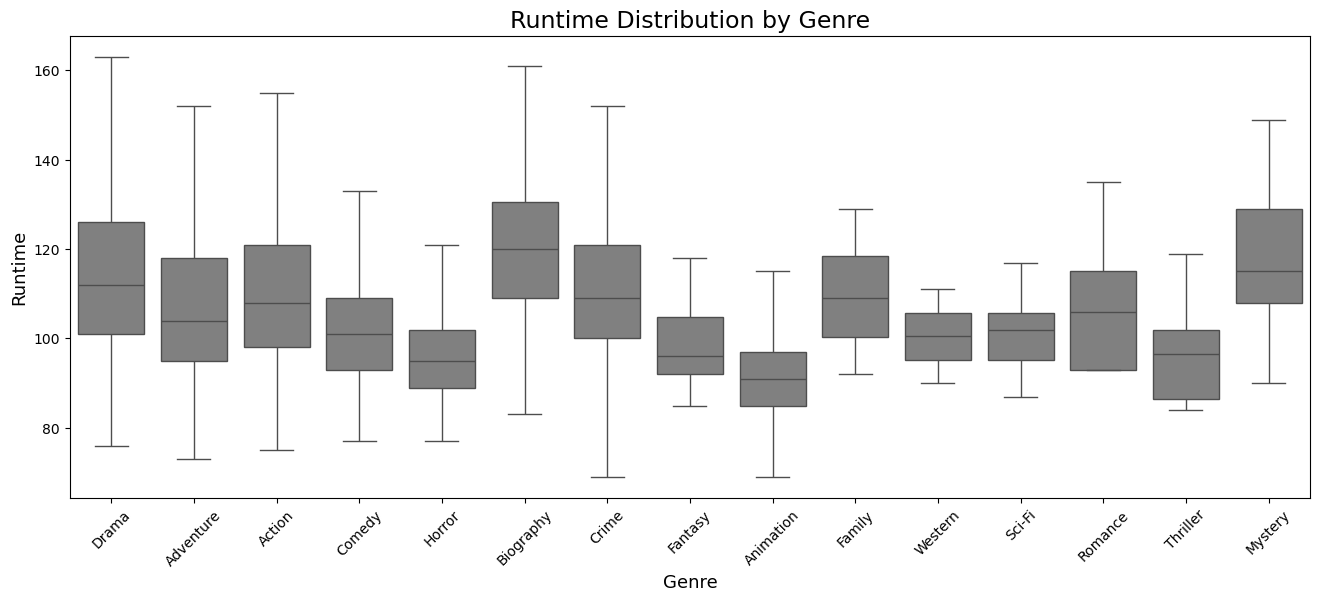

In [467]:
#Runtime of each Genre

#Boxplot
plt.figure(figsize=(16,6))
sns.boxplot(
    x='genre', 
    y='runtime', 
    data=df, 
    showfliers=False, 
    color= 'grey'
)

# Add titles and labels
plt.xlabel('Genre', fontsize=13)
plt.ylabel('Runtime',fontsize=13)
plt.xticks(rotation=45)
plt.title("Runtime Distribution by Genre", fontsize=17)
plt.show()

### Does runtime affect Gross?

Correlation coefficient (r): 0.28
Probability value (p): 3.520862576923664e-95


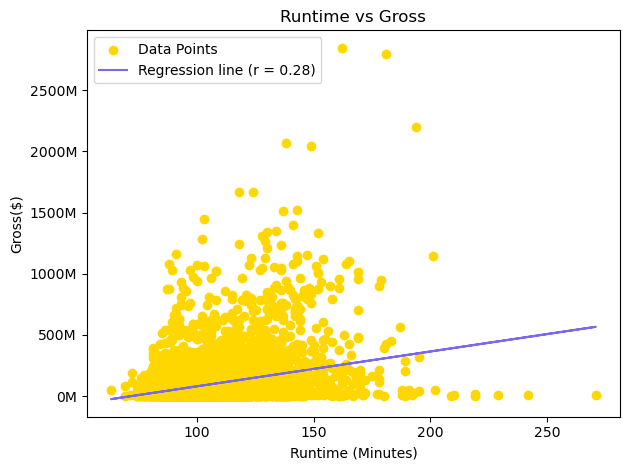

In [468]:
#Assign Values for duration and worldwide gross
duration = df['runtime']
worldwide_gross = df['gross']

#Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(duration, worldwide_gross)

# Calculate regression line values
regression_line = slope * duration + intercept

# Calculate the regression line values
print(f'Correlation coefficient (r): {r_value:.2f}')

#Print p-value
print(f'Probability value (p): {p_value}')

#Create Scatterplot
plt.scatter(
    duration, 
    worldwide_gross, 
    color='gold', 
    label ='Data Points'
)

plt.plot(
    duration, 
    regression_line, 
    color ='mediumslateblue', 
    label=f'Regression line (r = {r_value:.2f})'
)

# Add titles and labels
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Gross($)')
plt.title ('Runtime vs Gross')

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, pos: f'{y/1e6:.0f}M')
)

plt.tight_layout()
plt.legend()
plt.show()

### Budget vs Gross

Probability value (p): 0.0


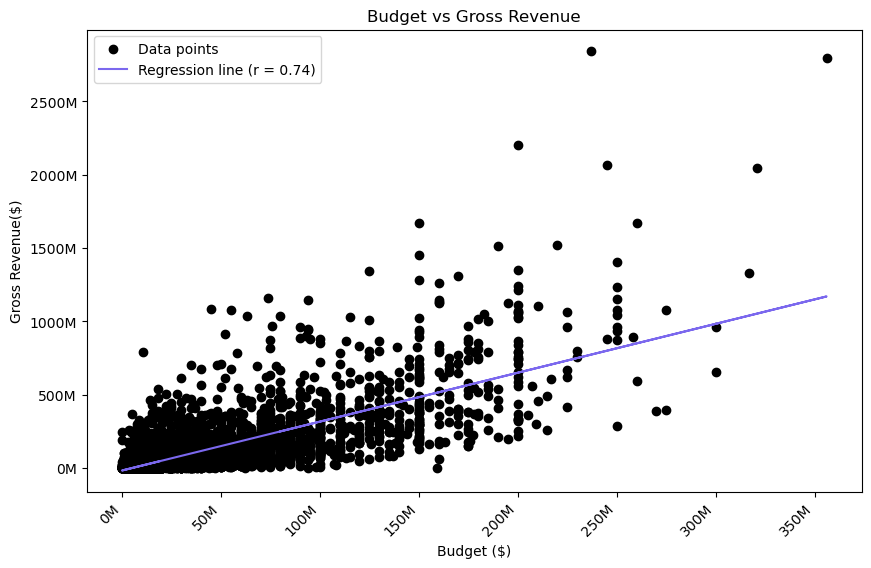

In [469]:
#Budget vs Gross

# Perform linear regression using scipy
slope, intercept, r_value, p_value, std_err = linregress(df['budget'], df['gross'])

# Calculate the regression line values
regression_line1 = slope * df['budget'] + intercept

#Print p-value
print(f'Probability value (p): {p_value}')

# Plot the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(
    df['budget'], 
    df['gross'], 
    color='black', 
    label='Data points'
)

plt.plot(
    df['budget'], 
    regression_line1, 
    color='mediumslateblue', 
    label=f'Regression line (r = {r_value:.2f})'
)

# Add titles and labels
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Gross Revenue($)') 
plt.xticks(rotation=45, ha='right')

# Format y-axis and x-axis in millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{y/1e6:.0f}M'))

plt.legend()
plt.show()

### Hypothesis Test (Do High-Budget Movies Have Higher ROI?)

In [476]:
#Null Hypothesis (H₀): High-budget movies do not have higher ROI than low-budget movies.

#Alternative Hypothesis (H₁): High-budget movies have higher ROI than low-budget movies.

#Significant value = 0.05

# Split data into high-budget and low-budget groups
median_budget = df['budget'].median()
high_budget = df[df['budget'] >= median_budget]['roi']
low_budget = df[df['budget'] < median_budget]['roi']

# Run two-sided test first
t_stat, p_val_two_sided = stats.ttest_ind(high_budget, low_budget, equal_var=False)
print("T-statistic:", t_stat)
print("Two-sided P-value:", p_val_two_sided)

# Convert to one-sided p-value
if t_stat > 0:
    p_val_one_sided = p_val_two_sided / 2
else:
    p_val_one_sided = 1 - (p_val_two_sided / 2)
print("One-sided P-value:", p_val_one_sided)

#Result
if p_val_one_sided < 0.05:
    print("Reject H₀ → High-budget movies earn significantly more ROI than low-budget movies.")
else:
    print("Fail to reject H₀ → No significant evidence that high-budget movies earn higher ROI.")


T-statistic: -1.6478561523049002
Two-sided P-value: 0.09949913133452995
One-sided P-value: 0.950250434332735
Fail to reject H₀ → No significant evidence that high-budget movies earn higher ROI.


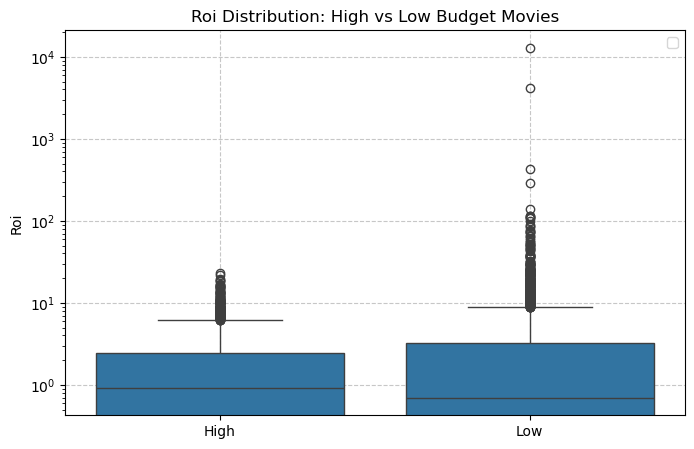

In [475]:
#Plot
plt.figure(figsize=(8,5))
sns.boxplot(x=['High']*len(high_budget) + ['Low']*len(low_budget), 
            y=pd.concat([high_budget, low_budget]))
plt.title("Roi Distribution: High vs Low Budget Movies")
plt.ylabel("Roi")
plt.grid(True, linestyle='--', alpha=0.7)
plt.yscale("log")
plt.legend()
plt.show()

#### Interpretation: 
##### We fail to reject H₀. There is no statistical evidence that high-budget movies earn higher ROI than low-budget movies. In fact, the negative t-statistic indicates that the mean ROI for high-budget films is slightly lower, though not significantly so.
#### Conclusion:
##### High-budget movies may bring larger absolute profits, but ROI efficiency is not higher than low-budget films.

### Predictive Analysis: Movie Gross Revenue using Gradient Boosting

In [143]:
# Select features
features = ["budget", "runtime", "votes", "genre", "rating", "release_month"]
X = df[features]
y = df["gross"]

# Train/test split
from sklearn.model_selection import train_test_split
y_binned = pd.qcut(y, q=10)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.75, 
                                                    random_state=617,
                                                    stratify=y_binned)

# Transform data
categorical_features = ['rating','genre','release_month']

X_train = pd.get_dummies(X_train_raw, 
                         prefix_sep = '_', 
                         columns = categorical_features, 
                         drop_first = True)

X_test = pd.get_dummies(X_test_raw, 
                         prefix_sep = '_', 
                         columns = categorical_features, 
                         drop_first = True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_train.head()


,budget,runtime,votes,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_TV-MA,rating_Unknown,...,release_month_December,release_month_February,release_month_January,release_month_July,release_month_June,release_month_March,release_month_May,release_month_November,release_month_October,release_month_September
7260,29000000,111.0,33000,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
6323,3000000,109.0,146000,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2810,17000000,111.0,5600,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4918,100000000,108.0,174000,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6697,11800000,118.0,120000,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False


### GradientBoostingRegressor

In [150]:
# Baseline model

gb = GradientBoostingRegressor(n_estimators = 100, 
                                random_state = 1031
)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1031)

In [151]:
# Predictions
pred_train = gb.predict(X_train)
pred_test = gb.predict(X_test)

# Metrics
print('Train RMSE: ', root_mean_squared_error(y_train, pred_train))
print('Test RMSE:  ', root_mean_squared_error(y_test, pred_test))
print('Train R2: ', r2_score(y_train, pred_train))
print('Test R2:  ', r2_score(y_test, pred_test))

Train RMSE:  76927587.18959498
Test RMSE:   82440555.18425062
Train R2:  0.8396257050773245
Test R2:   0.7686748162341783


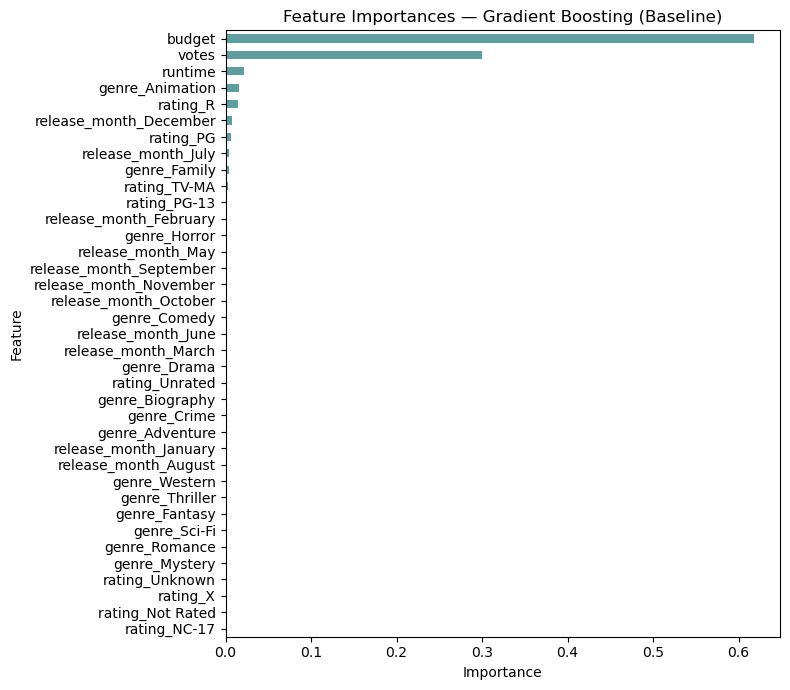

In [156]:
#Feature importance plot

plt.figure(figsize=(8,7))
(
    pd.Series(gb.feature_importances_, index=X_train.columns)
    .sort_values(ascending=True)
    .plot(kind="barh", color="cadetblue")
)
plt.title("Feature Importances — Gradient Boosting (Baseline)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [147]:
# Tuning

param_grid = {
    "n_estimators": [200, 300, 400, 500],
    "learning_rate":[0.05],
    "max_depth":    [3, 4],
    "min_samples_leaf":[2, 3, 4]
}

grid_gb = GridSearchCV(
    GradientBoostingRegressor(random_state=617),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1
)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=617),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05], 'max_depth': [3, 4],
                         'min_samples_leaf': [2, 3, 4],
                         'n_estimators': [200, 300, 400, 500]},
             scoring='neg_root_mean_squared_error')

In [148]:
print("Best parameters:", grid_gb.best_params_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 4, 'n_estimators': 200}


In [149]:
best_gb = grid_gb.best_estimator_

# Predictions
pred_train_tuning = best_gb.predict(X_train)
pred_test_tuning = best_gb.predict(X_test)

# Metrics
print('Train RMSE: ', root_mean_squared_error(y_train, pred_train_tuning))
print('Test RMSE:  ', root_mean_squared_error(y_test, pred_test_tuning))
print('Train R2: ', r2_score(y_train, pred_train_tuning))
print('Test R2:  ', r2_score(y_test, pred_test_tuning))

Train RMSE:  68595602.81230602
Test RMSE:   84743951.13506605
Train R2:  0.8724844666432314
Test R2:   0.7555677429890004


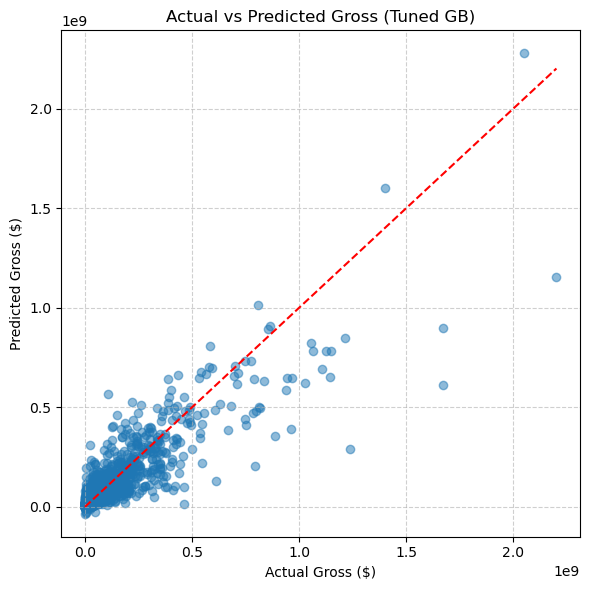

In [495]:
# Actual vs Predicted Gross

#plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_test_tuning, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Gross (Tuned GB)")
plt.xlabel("Actual Gross ($)")
plt.ylabel("Predicted Gross ($)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

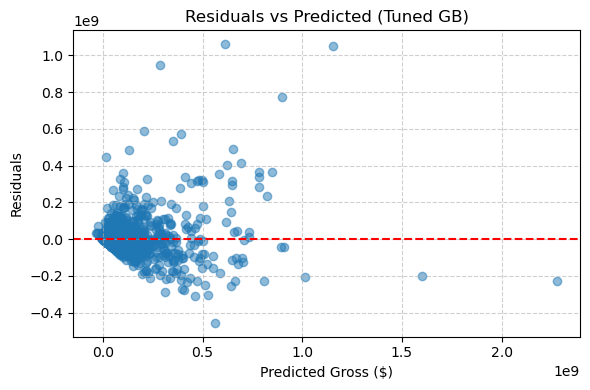

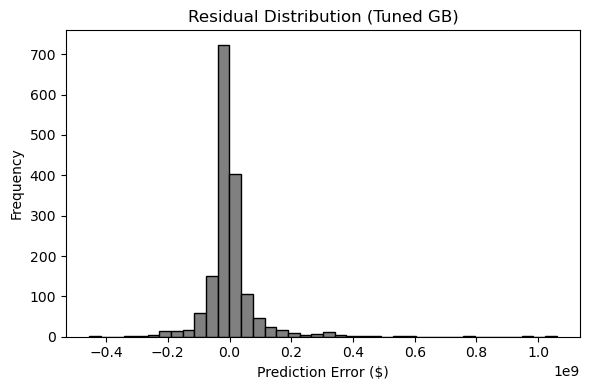

In [496]:
# Residual

residuals = y_test - pred_test_tuning

#plot
plt.figure(figsize=(6,4))
plt.scatter(pred_test_tuning, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Gross ($)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Tuned GB)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

#plot
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=40, color='gray', edgecolor='black')
plt.title("Residual Distribution (Tuned GB)")
plt.xlabel("Prediction Error ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [55]:
df.to_excel("cleaned_movies.xlsx", index=False)

In [56]:
import os

print(os.getcwd())

C:\Users\ajoal
